In [1]:
# 导入必要的库和原始数据集

import os
import sys
import time

import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import numpy as np

train_raw = pd.read_csv('data/train.csv')
store_raw = pd.read_csv('data/store.csv')
test_raw = pd.read_csv('data/test.csv')

C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(train_raw)

1017209

In [4]:
len(test_raw)

41088

In [7]:
store_raw.columns.values

array(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype=object)

In [13]:
train_raw[train_raw.columns.values[1:]].describe()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
test_raw[test_raw.columns.values[2:]].describe()

,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41077.000000,41088.000000,41088.000000
mean,3.979167,0.854322,0.395833,0.443487
std,2.015481,0.352787,0.489035,0.496802
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000
75%,6.000000,1.000000,1.000000,1.000000
max,7.000000,1.000000,1.000000,1.000000


In [16]:
store_raw[store_raw.columns.values[2:]].describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [37]:
train_raw[train_raw.Store==101][train_raw.SchoolHoliday==1][train_raw.StateHoliday==1]

C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [34]:
store_raw[store_raw.Store==101]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
100,101,d,c,2440.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


Text(0.5,1,'Store closed or open -- Sales')

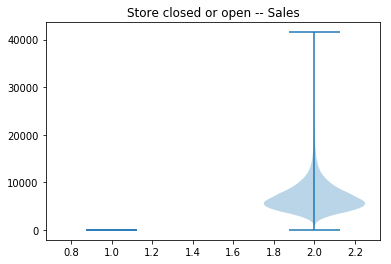

In [54]:
train_open = train_raw[train_raw.Open==0].Sales.values
train_closed = train_raw[train_raw.Open==1].Sales.values

import matplotlib.pyplot as plt
import seaborn

plt.violinplot([train_open,train_closed])
plt.title('Store closed or open -- Sales')

C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Day of Week -- Sales / store open only')

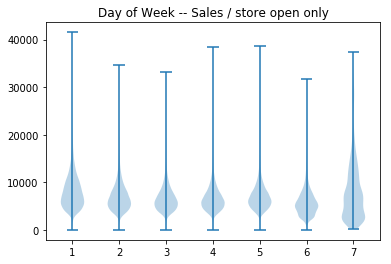

In [61]:
plt.violinplot([train_raw[train_raw.Open==1][train_raw.DayOfWeek==i].Sales for i in [1,2,3,4,5,6,7]])
plt.title('Day of Week -- Sales / store open only')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F20E085DD8>,
      dtype=object)

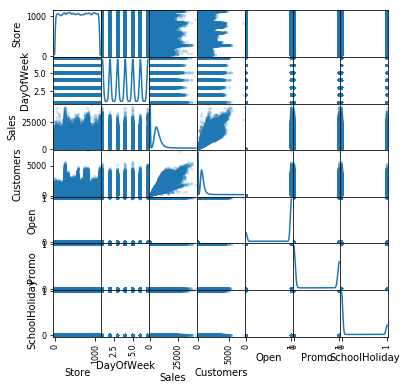

In [57]:
pd.plotting.scatter_matrix(train_raw, alpha=0.2, figsize=(6, 6), diagonal='kde')

C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'State Holiday(0,a,b,c,d) -- Sales / store open only')

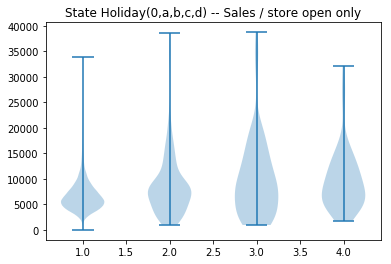

In [69]:
plt.violinplot([train_raw[train_raw.Open==1][train_raw.StateHoliday==i].Sales for i in [0,'a','b','c']])
plt.title('State Holiday(0,a,b,c,d) -- Sales / store open only')

C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'School Holiday(0,1) -- Sales / store open only')

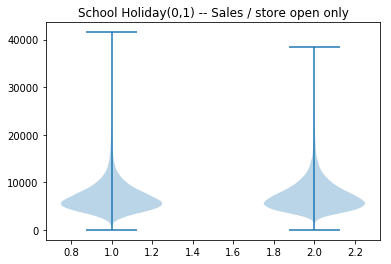

In [68]:
plt.violinplot([train_raw[train_raw.Open==1][train_raw.SchoolHoliday==i].Sales for i in [0,1]])
plt.title('School Holiday(0,1) -- Sales / store open only')

C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\siyuan\miniconda3\envs\capstone\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Promotion(0,1) -- Sales / store open only')

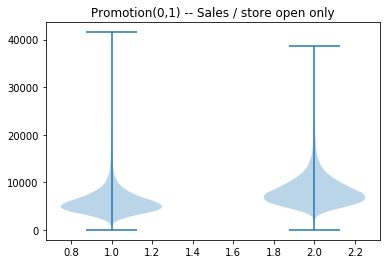

In [71]:
plt.violinplot([train_raw[train_raw.Open==1][train_raw.Promo==i].Sales for i in [0,1]])
plt.title('Promotion(0,1) -- Sales / store open only')

In [2]:
# 判断那些特征或标签出现了缺失

train_cols = train_raw.columns.values

print(train_cols)

for c in train_cols:
    NaN_lenth = len([i for i in train_raw[c] if pd.isnull(i)])
    if NaN_lenth!=0:
        print(c,'miss',NaN_lenth)

['Store' 'DayOfWeek' 'Date' 'Sales' 'Customers' 'Open' 'Promo'
 'StateHoliday' 'SchoolHoliday']


In [3]:
test_raw[test_raw.Store==262]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
201,202,262,4,2015-09-17,1.0,1,0,0
1057,1058,262,3,2015-09-16,1.0,1,0,0
1913,1914,262,2,2015-09-15,1.0,1,0,0
2769,2770,262,1,2015-09-14,1.0,1,0,0
3625,3626,262,7,2015-09-13,1.0,0,0,0
4481,4482,262,6,2015-09-12,1.0,0,0,0
5337,5338,262,5,2015-09-11,1.0,0,0,0
6193,6194,262,4,2015-09-10,1.0,0,0,0
7049,7050,262,3,2015-09-09,1.0,0,0,0
7905,7906,262,2,2015-09-08,1.0,0,0,0


In [5]:
train_raw[train_raw.Store==262]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
261,262,5,2015-07-31,25774,3669,1,1,0,1
1376,262,4,2015-07-30,22253,3132,1,1,0,1
2491,262,3,2015-07-29,21041,3123,1,1,0,1
3606,262,2,2015-07-28,22442,3143,1,1,0,1
4721,262,1,2015-07-27,22185,3150,1,1,0,1
5836,262,7,2015-07-26,32547,4783,1,0,0,0
6951,262,6,2015-07-25,17118,2985,1,0,0,0
8066,262,5,2015-07-24,18985,3273,1,0,0,1
9181,262,4,2015-07-23,17513,2895,1,0,0,1
10296,262,3,2015-07-22,17663,2853,1,0,0,1
